# __Linear regressiom__
In linear regression we find out the best fit line to the given data and predicts the outcome to the other stiuation using the result

In [65]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import pickle

In [66]:
data = pd.read_csv("student-mat.csv",sep=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [67]:
data=data[["G1","G2","G3","studytime","failures","absences"]]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [68]:
predict="G3" # Here G3 is a 'Label' since we are going to predict it
x=np.array(data.drop([predict],axis=1))
x

array([[ 5,  6,  2,  0,  6],
       [ 5,  5,  2,  0,  4],
       [ 7,  8,  2,  3, 10],
       ...,
       [10,  8,  1,  3,  3],
       [11, 12,  1,  0,  0],
       [ 8,  9,  1,  0,  5]], dtype=int64)

In [69]:
y=np.array(data[predict])
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

Here
+ x_train will have 90%(0.9) data of x
+ x_test will have 10%(0.1) data of x (For using as the test for the model)
+ y_train will have 90%(0.9) data of y
+ y_test will have 10%(0.1) data of y


In [70]:
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [71]:
linear=linear_model.LinearRegression()

this will find the best fit line to the data

In [72]:
linear.fit(x_train, y_train)


LinearRegression()

This will compare the result obtained by the model from x_test to the actual result which is y_test

In [73]:
linear.score(x_test,y_test)

0.827592800290641

In [74]:
linear.coef_

array([ 0.16239438,  0.96718749, -0.22115956, -0.3394419 ,  0.04607489])

In [75]:
linear.intercept_

-1.4617149070171749

_Lets find the best model and max acc_

In [76]:
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        """We are using pickle here to save the data for the future
        to use it with doing the calculations again"""
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.8054541616668285
Accuracy: 0.7268399077802135
Accuracy: 0.93549772467872
Accuracy: 0.784413652728261
Accuracy: 0.9079687166127394
Accuracy: 0.8821770849962293
Accuracy: 0.8234405963501762
Accuracy: 0.8998945295536035
Accuracy: 0.789957682532134
Accuracy: 0.8147354578639826
Accuracy: 0.8295781601776038
Accuracy: 0.7607443846768663
Accuracy: 0.6119421495455838
Accuracy: 0.6688470480630196
Accuracy: 0.8699105619121227
Accuracy: 0.8841133802376512
Accuracy: 0.8572844492965663
Accuracy: 0.7610086741097408
Accuracy: 0.8949255389534125
Accuracy: 0.9318994611610609


_Again loading the best model_

In [77]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")
#Comparing the predicted value by the model to the real value
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

-------------------------
Coefficient: 
 [ 0.14538791  0.98057576 -0.21021555 -0.30820268  0.0361012 ]
Intercept: 
 -1.3914922811484765
-------------------------
9.200461143069205 [11  9  1  1 19] 10
12.868097139042662 [13 13  3  0  7] 14
16.216278597484816 [16 16  4  0 12] 16
8.248564104665665 [8 9 2 0 2] 8
7.057772798913751 [8 8 3 0 2] 10
11.971023365193416 [14 12  2  1  8] 12
3.5902525365681335 [7 5 3 1 0] 0
-0.43860454989196873 [8 0 1 0 0] 0
16.275697675135973 [16 16  2  0  2] 16
10.92731419997165 [10 11  1  0  8] 10
10.343416937417661 [ 9  9  2  0 56] 8
14.867316054665384 [15 15  3  0  0] 15
10.943046830158574 [13 11  3  0  8] 11
6.359614998051447 [8 7 2 0 4] 6
10.36346139164174 [11 11  3  0  0] 10
16.348883180775157 [17 16  2  0  0] 17
15.076548503740874 [14 15  2  0  4] 15
18.16464678175019 [16 18  2  0  0] 18
11.670914169846453 [13 12  3  0  1] 12
8.493131314453036 [ 7 10  3  1  0] 10
12.752418767689308 [12 13  2  0  2] 12
12.055244067926449 [13 12  1  0  0] 12
13.9515679390844

#### Ploting the graph of the model

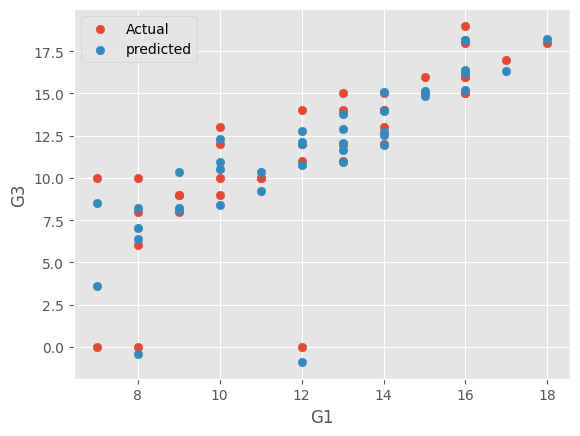

In [103]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
plt.scatter(x_test[:,0], y_test)
plt.scatter(x_test[:,0],linear.predict(x_test))
plt.legend(["Actual","predicted"])
plt.xlabel("G1")
plt.ylabel("G3");